In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN=pd.read_csv("D:\\R datasets\\regression\\Train_UWu5bXk.csv")
VALID=pd.read_csv("D:\\R datasets\\regression\\Test_u94Q5KV.csv")

In [3]:
TRAIN.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(TRAIN.shape,VALID.shape)
print(TRAIN.columns,VALID.columns)

(8523, 12) (5681, 11)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [17]:
TRAIN.apply(unique().size,axis=1)

NameError: name 'unique' is not defined

In [5]:
for i in TRAIN.columns:
    print (TRAIN[i].value_counts())

FDG33    10
FDW13    10
FDX04     9
FDF56     9
FDW49     9
FDT07     9
FDP25     9
FDD38     9
FDG09     9
FDX20     9
NCL31     9
NCF42     9
FDW26     9
FDU12     9
FDX31     9
FDV38     9
NCQ06     9
NCY18     9
NCB18     9
FDV60     9
NCJ30     9
FDQ40     9
FDO19     9
FDF52     9
DRE49     9
DRN47     9
NCI54     9
FDO37     8
FDY03     8
DRK35     8
         ..
FDI36     2
FDE38     2
FDR03     2
FDA48     2
FDG28     2
NCC55     2
NCW30     2
FDR57     2
FDW10     2
DRE01     2
NCX53     2
FDE39     2
NCG19     2
FDF38     2
FDZ50     2
DRG25     2
DRC24     2
FDB47     2
FDT33     2
DRI59     2
NCS41     2
FDN52     1
FDO33     1
FDC23     1
FDY43     1
FDK57     1
FDT35     1
DRF48     1
FDQ60     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
16.700    66
10.500    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
15.000    59
18.850    59
15.850    

In [6]:
VALID['Item_Outlet_Sales']=np.nan

In [7]:
COMPLETE=pd.concat([TRAIN,VALID],axis=0)

In [8]:
COMPLETE.shape

(14204, 12)

In [9]:
COMPLETE.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDZ56,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [10]:
COMPLETE[['Item_Identifier','Item_Visibility']].sort_values('Item_Identifier')

,Item_Identifier,Item_Visibility
7467,DRA12,0.041113
1245,DRA12,0.040912
5081,DRA12,0.041010
500,DRA12,0.040946
1693,DRA12,0.000000
8043,DRA12,0.068535
3912,DRA12,0.040748
118,DRA12,0.041178
1197,DRA12,0.000000
8195,DRA24,0.039895


In [11]:
IV=COMPLETE.loc[COMPLETE['Item_Visibility']>0,['Item_Identifier','Item_Visibility']].groupby('Item_Identifier',as_index=False).mean()

In [12]:
for index,value in IV.iterrows():
    COMPLETE.loc[COMPLETE['Item_Identifier']==value['Item_Identifier'],'Item_Visibility']=value['Item_Visibility']

In [13]:
COMPLETE[['Item_Identifier','Item_Visibility']].sort_values('Item_Identifier')

,Item_Identifier,Item_Visibility
7467,DRA12,0.044920
1245,DRA12,0.044920
5081,DRA12,0.044920
500,DRA12,0.044920
1693,DRA12,0.044920
8043,DRA12,0.044920
3912,DRA12,0.044920
118,DRA12,0.044920
1197,DRA12,0.044920
8195,DRA24,0.045646


In [14]:
COMPLETE[['Item_Identifier','Item_Weight']].sort_values('Item_Identifier')

,Item_Identifier,Item_Weight
7467,DRA12,11.60
1245,DRA12,11.60
5081,DRA12,11.60
500,DRA12,11.60
1693,DRA12,11.60
8043,DRA12,11.60
3912,DRA12,NaN
118,DRA12,11.60
1197,DRA12,11.60
8195,DRA24,19.35


In [15]:
IW=COMPLETE.loc[COMPLETE['Item_Weight'].notnull(),['Item_Identifier','Item_Weight']].groupby('Item_Identifier',as_index=False).mean()

In [16]:
IW

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
5,DRB24,8.785
6,DRB25,12.300
7,DRB48,16.750
8,DRC01,5.920
9,DRC12,17.850


In [17]:
for index,value in IW.iterrows():
    COMPLETE.loc[COMPLETE['Item_Identifier']==value['Item_Identifier'],'Item_Weight']=value['Item_Weight']

In [18]:
COMPLETE[['Item_Identifier','Item_Weight']].sort_values('Item_Identifier')

,Item_Identifier,Item_Weight
7467,DRA12,11.60
1245,DRA12,11.60
5081,DRA12,11.60
500,DRA12,11.60
1693,DRA12,11.60
8043,DRA12,11.60
3912,DRA12,11.60
118,DRA12,11.60
1197,DRA12,11.60
8195,DRA24,19.35


In [19]:
COMPLETE['Item_Cat']=COMPLETE['Item_Identifier'].apply(lambda x: x[0:2])

In [20]:
COMPLETE.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
0,FDA15,9.30,Low Fat,0.017235,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.020653,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.019397,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [21]:
pd.crosstab(COMPLETE['Item_Type'],COMPLETE['Item_Cat'])

Item_Cat,DR,FD,NC
Item_Type,,,
Baking Goods,0,1086,0
Breads,0,416,0
Breakfast,0,186,0
Canned,0,1084,0
Dairy,229,907,0
Frozen Foods,0,1426,0
Fruits and Vegetables,0,2013,0
Hard Drinks,362,0,0
Health and Hygiene,0,0,858


In [22]:
COMPLETE['Item_Cat'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Cat, dtype: int64

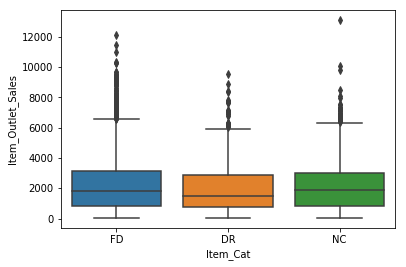

In [23]:
sns.boxplot(data=COMPLETE,x='Item_Cat',y='Item_Outlet_Sales')
plt.show()

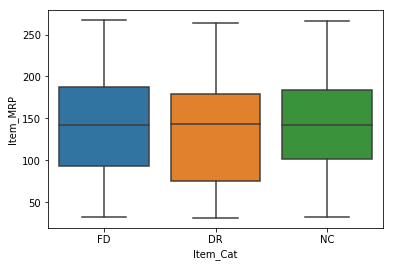

In [24]:
sns.boxplot(data=COMPLETE,x='Item_Cat',y='Item_MRP')
plt.show()

In [25]:
COMPLETE['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
COMPLETE['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)

In [27]:
COMPLETE['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
COMPLETE['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [28]:
COMPLETE['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
pd.crosstab(COMPLETE['Item_Fat_Content'],COMPLETE['Item_Cat'])

Item_Cat,DR,FD,NC
Item_Fat_Content,,,
Low Fat,1208,5291,2686
Regular,109,4910,0


In [30]:
pd.crosstab(COMPLETE['Item_Type'],COMPLETE['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,542,544
Breads,222,194
Breakfast,66,120
Canned,549,535
Dairy,691,445
Frozen Foods,731,695
Fruits and Vegetables,1086,927
Hard Drinks,362,0
Health and Hygiene,858,0


In [31]:
COMPLETE[['Item_Type','Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Type','Item_Fat_Content'],as_index=False,axis=0).sum()

,Item_Type,Item_Fat_Content,Item_Outlet_Sales
0,Baking Goods,Low Fat,5.805237e+05
1,Baking Goods,Regular,6.850017e+05
2,Breads,Low Fat,3.056808e+05
3,Breads,Regular,2.475564e+05
4,Breakfast,Low Fat,9.944189e+04
5,Breakfast,Regular,1.328571e+05
6,Canned,Low Fat,7.531716e+05
7,Canned,Regular,6.909799e+05
8,Dairy,Low Fat,8.966828e+05
9,Dairy,Regular,6.259113e+05


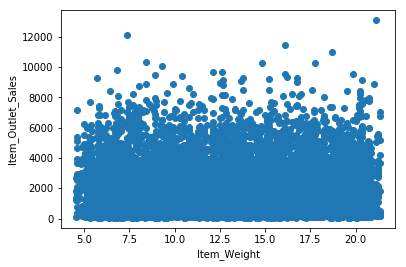

In [32]:
###### SCATTER PLOT
plt.scatter(COMPLETE.Item_Weight,COMPLETE.Item_Outlet_Sales)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.show()

###### WEAK IV

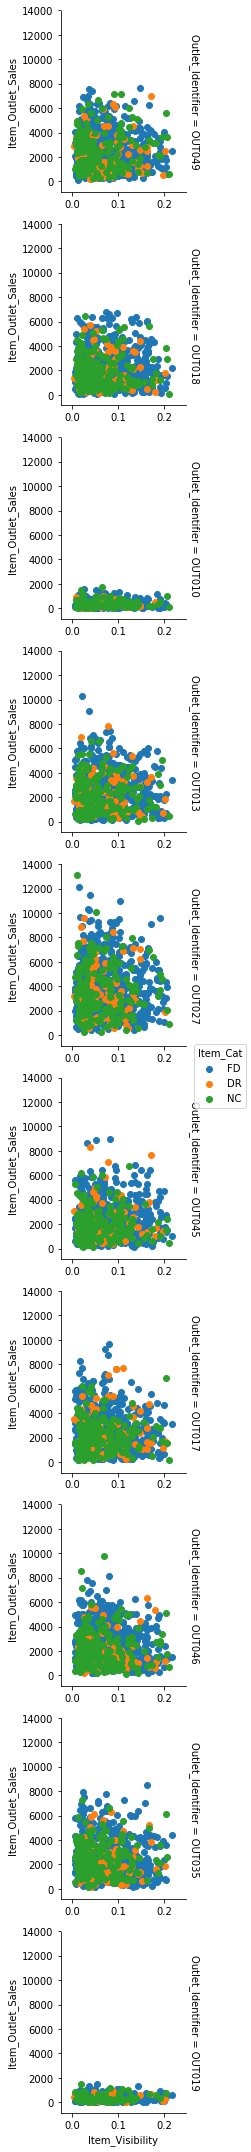

In [33]:
grid = sns.FacetGrid(COMPLETE, row="Outlet_Identifier",hue="Item_Cat", margin_titles=True)
grid.map(plt.scatter,'Item_Visibility','Item_Outlet_Sales').add_legend()

plt.show()

In [34]:
COMPLETE.Item_Visibility.describe()

count    14204.000000
mean         0.070458
std          0.046967
min          0.003895
25%          0.032617
50%          0.059044
75%          0.099149
max          0.217421
Name: Item_Visibility, dtype: float64

In [35]:
def CAT(Fat,Category):
    if(Fat=='Low Fat'):
        if(Category=='DR'):
            return 'Low Fat Drinks'
        elif(Category=='FD'):
            return 'Low Fat Foods'
        else:
            return 'Non Consumables'
    else:
        if(Category=='DR'):
            return 'Regular Drinks'
        elif(Category=='FD'):
            return 'Regular Foods'         

In [36]:
COMPLETE['Item_Cat_Fat']=COMPLETE[['Item_Cat','Item_Fat_Content']].apply(lambda x: CAT(x['Item_Fat_Content'],x['Item_Cat']),axis=1)

In [37]:
COMPLETE.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat,Item_Cat_Fat
0,FDA15,9.30,Low Fat,0.017235,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Low Fat Foods
1,DRC01,5.92,Regular,0.020653,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Regular Drinks
2,FDN15,17.50,Low Fat,0.019397,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Low Fat Foods
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Regular Foods
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Consumables


In [38]:
T1=COMPLETE.loc[(COMPLETE.Item_Type=='Meat')&(COMPLETE.Outlet_Identifier=='OUT013'),['Item_MRP','Item_Outlet_Sales']]

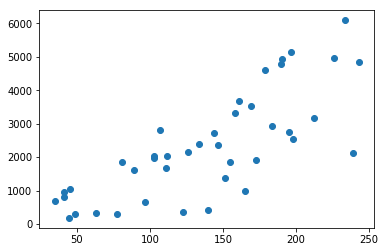

In [39]:
######## SALE OF HIGH MRP ITEM IS MORE COMPARED TO LOW MRP ITEMS
plt.scatter(T1['Item_MRP'],T1['Item_Outlet_Sales'])
plt.show()

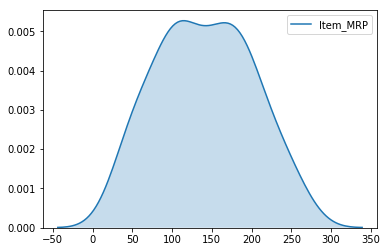

In [40]:
sns.kdeplot(T1['Item_MRP'], shade=True)
plt.show()

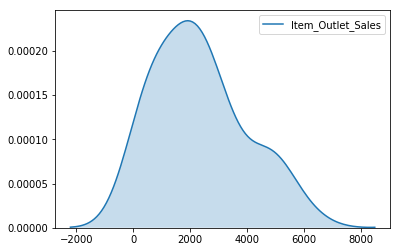

In [41]:
sns.kdeplot(T1.loc[T1['Item_Outlet_Sales'].notnull(),'Item_Outlet_Sales'], shade=True)
plt.show()

In [42]:
pd.crosstab(COMPLETE.Outlet_Identifier,COMPLETE.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Identifier,,,,
OUT010,925,0,0,0
OUT013,0,1553,0,0
OUT017,0,1543,0,0
OUT018,0,0,1546,0
OUT019,880,0,0,0
OUT027,0,0,0,1559
OUT035,0,1550,0,0
OUT045,0,1548,0,0
OUT046,0,1550,0,0


In [43]:
pd.crosstab(COMPLETE.Outlet_Identifier,COMPLETE.Item_Cat_Fat)

Item_Cat_Fat,Low Fat Drinks,Low Fat Foods,Non Consumables,Regular Drinks,Regular Foods
Outlet_Identifier,,,,,
OUT010,81,337,177,7,323
OUT013,133,579,292,12,537
OUT017,133,575,291,12,532
OUT018,132,577,290,12,535
OUT019,69,333,168,6,304
OUT027,133,580,295,12,539
OUT035,133,577,292,12,536
OUT045,131,576,294,12,535
OUT046,132,578,294,12,534


In [44]:
pd.crosstab(COMPLETE.Outlet_Identifier,COMPLETE.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Identifier,,,
OUT010,0,0,925
OUT013,0,0,1553
OUT017,0,1543,0
OUT018,0,0,1546
OUT019,880,0,0
OUT027,0,0,1559
OUT035,0,1550,0
OUT045,0,1548,0
OUT046,1550,0,0


In [45]:
T2=COMPLETE.loc[(COMPLETE.Item_Cat_Fat=='Non Consumables')&(COMPLETE.Outlet_Identifier.isin(['OUT013','OUT017'])),['Item_MRP','Item_Outlet_Sales','Outlet_Identifier']]

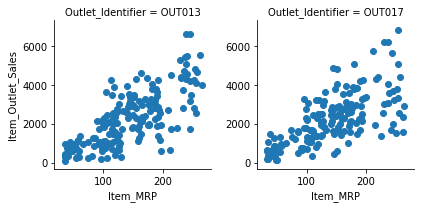

In [46]:
grid=sns.FacetGrid(T2,col='Outlet_Identifier')
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales')
plt.show()

In [47]:
T2.sort_values(by='Item_MRP')

,Item_MRP,Item_Outlet_Sales,Outlet_Identifier
2276,31.9900,NaN,OUT013
121,33.0558,NaN,OUT017
4024,33.5874,635.1732,OUT017
3373,33.7900,199.7400,OUT017
1518,34.0532,575.2512,OUT017
5591,34.6874,317.5866,OUT017
4333,34.8190,NaN,OUT017
2296,34.8190,1061.9510,OUT017
2370,34.9190,73.2380,OUT013
2911,35.4216,173.1080,OUT017


In [48]:
IT=COMPLETE[['Item_Identifier','Item_Weight']].groupby('Item_Identifier',as_index=False).mean()

In [49]:
for index,value in IT.iterrows():
    COMPLETE.loc[COMPLETE['Item_Identifier']==value['Item_Identifier'],'Item_Weight']=value['Item_Weight']

In [50]:
COMPLETE.loc[COMPLETE['Outlet_Size'].isnull(),'Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [51]:
pd.crosstab(COMPLETE['Outlet_Size'],COMPLETE['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [52]:
COMPLETE.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Cat', 'Item_Cat_Fat'],
      dtype='object')

In [53]:
COMPLETE[['Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales']].groupby(by=['Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'],as_index=True).mean()

,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT013,High,Tier 3,Supermarket Type1,2298.995256
OUT018,Medium,Tier 3,Supermarket Type2,1995.498739
OUT019,Small,Tier 1,Grocery Store,340.329723
OUT027,Medium,Tier 3,Supermarket Type3,3694.038558
OUT035,Small,Tier 2,Supermarket Type1,2438.841866
OUT046,Small,Tier 1,Supermarket Type1,2277.844267
OUT049,Medium,Tier 1,Supermarket Type1,2348.354635


In [54]:
COMPLETE[['Outlet_Identifier', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales']].groupby(by=['Outlet_Identifier', 'Outlet_Location_Type','Outlet_Type'],as_index=True).mean()

,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,
OUT010,Tier 3,Grocery Store,339.351662
OUT013,Tier 3,Supermarket Type1,2298.995256
OUT017,Tier 2,Supermarket Type1,2340.675263
OUT018,Tier 3,Supermarket Type2,1995.498739
OUT019,Tier 1,Grocery Store,340.329723
OUT027,Tier 3,Supermarket Type3,3694.038558
OUT035,Tier 2,Supermarket Type1,2438.841866
OUT045,Tier 2,Supermarket Type1,2192.384798
OUT046,Tier 1,Supermarket Type1,2277.844267


In [55]:
PL=COMPLETE[['Outlet_Type', 'Item_Outlet_Sales']].groupby(['Outlet_Type'],as_index=False)

In [158]:
PL.mean()

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,339.828500
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Supermarket Type3,3694.038558


In [56]:
COMPLETE.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Cat', 'Item_Cat_Fat'],
      dtype='object')

In [57]:
COMPLETE=pd.concat([COMPLETE,pd.get_dummies(COMPLETE[['Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']])],axis=1)

In [58]:
COMPLETE

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,Low Fat,0.017235,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,1,1,0,0,0,1,0,0
1,DRC01,5.920,Regular,0.020653,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,0,0,1,0,0,1,0
2,FDN15,17.500,Low Fat,0.019397,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,0,1,1,0,0,0,1,0,0
3,FDX07,19.200,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.930,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,...,0,0,0,0,0,1,0,1,0,0
5,FDP36,10.395,Regular,0.091294,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,...,0,0,0,0,0,1,0,0,1,0
6,FDO10,13.650,Regular,0.014183,Snack Foods,57.6588,OUT013,1987,High,Tier 3,...,0,0,0,0,0,1,0,1,0,0
7,FDP10,19.000,Low Fat,0.146434,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,...,0,0,0,0,0,1,0,0,0,1
8,FDH17,16.200,Regular,0.018057,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,...,1,0,0,0,1,0,0,1,0,0
9,FDU28,19.200,Regular,0.108865,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,...,0,0,0,0,1,0,0,1,0,0


In [59]:
COMPLETE.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Cat', 'Item_Cat_Fat',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet

In [60]:
COMPLETE=pd.concat([COMPLETE,pd.get_dummies(COMPLETE['Item_Cat_Fat'])],axis=1)

In [61]:
COMPLETE.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Cat', 'Item_Cat_Fat',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet

In [62]:
VALIDATION=COMPLETE.loc[COMPLETE['Item_Outlet_Sales'].isnull(),]
TRAINA=COMPLETE.loc[COMPLETE['Item_Outlet_Sales'].notnull(),]

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
Y=TRAINA['Item_Outlet_Sales']
X=TRAINA[attributes]

In [64]:
attributes=np.asarray(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Low Fat Drinks', 'Low Fat Foods',
       'Non Consumables', 'Regular Drinks', 'Regular Foods','Item_Weight','Item_Visibility',
        'Item_MRP'])

In [66]:
type(attributes)

numpy.ndarray

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
clf=LinearRegression()

In [70]:
clf=clf.fit(X_train,y_train)

In [71]:
clf.coef_

array([ -3.70539424e+13,  -3.70539424e+13,  -3.70539424e+13,
        -3.70539424e+13,  -3.70539424e+13,  -3.70539424e+13,
        -3.70539424e+13,  -3.70539424e+13,  -7.80082999e+12,
        -7.80082999e+12,  -3.70539424e+13,  -7.80082999e+12,
        -3.70539424e+13,  -3.70539424e+13,  -3.70539424e+13,
        -3.70539424e+13,  -6.65158691e+02,  -5.06474609e+01,
         5.99003906e+01,  -4.39316406e+01,  -4.26728516e+02,
         8.46731445e+02,   7.80224609e+01,  -1.05382812e+02,
         1.05722168e+02,   2.01543457e+02,  -1.19318359e+02,
         3.23554688e+01,   8.69941406e+01,  -1.09190137e+03,
         2.89132812e+02,  -4.39003906e+01,   8.46692749e+02,
         5.85062249e+12,   5.85062249e+12,  -2.34024900e+13,
         5.85062249e+12,   5.85062249e+12,  -2.56787109e+00,
        -2.75209717e+02,   1.56171875e+01])

In [72]:
Y_prediction = clf.predict(X_test)

In [73]:
from sklearn import metrics
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_test, Y_prediction)))
    

RMSE : 1109


In [74]:
VALID.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [75]:
XVALID=VALIDATION[attributes]

In [76]:
Y_VALID=clf.predict(XVALID)

In [77]:
Y_VALID

array([ 1822.5703125 ,  1535.69921875,  1862.0859375 , ...,  1833.8515625 ,
        3538.2265625 ,  1277.77734375])

In [78]:
OUTPUT=VALID[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [79]:
OUTPUT['Item_Outlet_Sales']=Y_VALID

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
OUTPUT

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1822.570312
1,FDW14,OUT017,1535.699219
2,NCN55,OUT010,1862.085938
3,FDQ58,OUT017,2601.843750
4,FDY38,OUT027,5190.410156
5,FDH56,OUT046,1939.906250
6,FDL48,OUT018,583.613281
7,FDC48,OUT027,2862.503906
8,FDN33,OUT045,1515.019531
9,FDA36,OUT017,3127.574219


In [84]:
OUTPUT.to_csv('D:\\R datasets\\regression\\OP1.csv',index=False)

In [83]:
help(OUTPUT.to_csv)

Help on method to_csv in module pandas.core.frame:

to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.') method of pandas.core.frame.DataFrame instance
    Write DataFrame to a comma-separated values (csv) file
    
    Parameters
    ----------
    path_or_buf : string or file handle, default None
        File path or object, if None is provided the result is returned as
        a string.
    sep : character, default ','
        Field delimiter for the output file.
    na_rep : string, default ''
        Missing data representation
    float_format : string, default None
        Format string for floating point numbers
    columns : sequence, optional
        Columns to write
    header : boolean or list of string, default T

In [85]:
from sklearn.linear_model import Ridge

In [86]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as
 |      LogisticRegression or LinearSVC. If an

In [87]:
clf=Ridge(alpha=0.05,normalize=True)
clf=clf.fit(X_train,y_train)

In [88]:
Y_prediction = clf.predict(X_test)
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_test, Y_prediction)))

RMSE : 1108


In [89]:
Y_VALID=clf.predict(XVALID)
OUTPUT=VALID[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
OUTPUT['Item_Outlet_Sales']=Y_VALID
OUTPUT.to_csv('D:\\R datasets\\regression\\OP2.csv',index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [92]:
clf=clf.fit(X_train,y_train)
Y_prediction = clf.predict(X_test)
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_test, Y_prediction)))
Y_VALID=clf.predict(XVALID)
OUTPUT=VALID[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
OUTPUT['Item_Outlet_Sales']=Y_VALID
OUTPUT.to_csv('D:\\R datasets\\regression\\OP3.csv',index=False)

RMSE : 1081


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)

In [95]:
clf=clf.fit(X_train,y_train)
Y_prediction = clf.predict(X_test)
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_test, Y_prediction)))
Y_VALID=clf.predict(XVALID)
OUTPUT=VALID[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
OUTPUT['Item_Outlet_Sales']=Y_VALID
OUTPUT.to_csv('D:\\R datasets\\regression\\OP4.csv',index=False)

RMSE : 1075


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
